In [1]:
import os
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import linear_model
import statsmodels.api as sm
import matplotlib.pyplot as plt
from scipy.stats import iqr

In [2]:
os.getcwd()
os.chdir('C:\\Users\\STSC\Desktop\\Fall 2020 Syllabus\\Ban612')
house_sample= pd.read_csv('data2.csv')

In [3]:
#Remove spaces in colmn names,rename index, fill in Not rated as O and remove string car from column garage.
house_sample.columns = house_sample.columns.str.strip()
house_sample.rename_axis(index='Seq', inplace=True)
house_sample = house_sample.replace(['Not rated'],0)
house_sample['garage'] = house_sample['garage'].str.replace(r'\D', '')
house_sample['garage'].fillna(0, inplace=True)

In [4]:
house_sample

,total,bed,bath,square,lot,price,type,built,garage,address,city,state,zip,elementary school,middle school,high school,Collateral,CoreLogic,Quantarium
Seq,,,,,,,,,,,,,,,,,,,
0,"4,200,000",8,NaN,7200,3236.0,583,Multi-Family Home,1900.0,3,176-178 Page St,San Francisco,CA,94102,0,2,6,$1851000 $1802064 $1873233,$2593100 - $2567900,$2404869 $2123874 $2428671
1,"1,485,000",2,2.0,1100,22651.0,"1,350",Condo,2014.0,1,300 Ivy St Apt 312,San Francisco,CA,94102,0,2,6,$1443000 $1229343 $1277894,NaN,$1393492 $1217410 $1213049
2,"2,250,000",10,NaN,3108,1707.0,724,Multi-Family Home,1900.0,0,188-190 Guerrero St,San Francisco,CA,94103,2,2,4,$2160000 $1896314 $2204757,$1838900 $1498600 $1897800,$1869626 $1664132 $1902951
3,"1,399,000",2,2.5,1930,NaN,725,Condo,2000.0,1,725 Tehama St Unit 3,San Francisco,CA,94103,0,2,5,$1491000 $1142108 $1327877,NaN,$1415477 $1249816 $1273104
4,"1,195,000",2,2.5,1537,NaN,777,Condo,1999.0,2,786 Minna St Apt 8,San Francisco,CA,94103,0,2,5,$1258000 $1143008 $1328923,NaN,$1220363 $1240076 $1242719
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
498,"1,250,000",3,3.5,1548,730.0,807,Townhome,2010.0,0,1797 Hillebrant Pl,Santa Clara,CA,95050,6,5,4,$1189000 $921822 $1148842,$1369800 $894600 $1352100,$1323251 $890766 $1172638
499,"649,000",1,1.0,931,NaN,697,Condo,1985.0,1,880 N Winchester Blvd Apt 204,Santa Clara,CA,95050,6,6,5,$598000 $527438 $657332,$723500 $441800 $719700,$731575 $636366 $784337$1698000
500,"1,698,000",4,3.0,1920,6178.0,884,Single Family Home,1961.0,2,648 Cambridge Dr,Santa Clara,CA,95051,5,6,7,$1638000 $1040673 $1339705,$1748600 $1217800 $1720700,$1708648 $1309058 $1521506


In [5]:
#Check to see if column 0-4 have any null values and then count how many. Drop those columns. Then fill in any other missning null with O
x = house_sample.index[house_sample.iloc[:,:4].isnull().any(axis=1)]
rows_missing_val = len(x)
house_sample.drop(house_sample.index[house_sample.iloc[:,:4].isnull().any(axis=1)], inplace=True)
y = house_sample.index[house_sample.isnull().any(axis=1)]
house_sample = house_sample.fillna(0)

In [6]:
#Shows count of how many rows had a null value between columns 0-4
if rows_missing_val >0:
    print('Enter {} new housing url to make sure we have 500 data points that is missing no info from columns 1-7.'.format(rows_missing_val))

Enter 7 new housing url to make sure we have 500 data points that is missing no info from columns 1-7.


In [7]:
#Remove data where year of home was built is zero
house_sample.drop(house_sample.index[house_sample['built']==0], inplace=True)

In [8]:
#Remove $,commas,spacing from total column and change it to a float. Also remove left and right side spaces from city column.
house_sample['total'] = house_sample['total'].str.replace(',', '').str.replace('$', '').str.replace(' ','').astype(float)
house_sample['city']= house_sample['city'].str.strip()

In [9]:
#Replace invalid data
house_sample.isin(['10-Sep']).any()
house_sample.loc[house_sample['elementary school'] == '10-Sep']
house_sample['elementary school'] = house_sample['elementary school'].replace(['10-Sep'],'8')

In [10]:
#Change dtypes and view them
house_sample = house_sample.astype({'total': 'int64', 'garage': 'int32'})
house_sample.iloc[:,[13,14,15]] = house_sample.iloc[:,[13,14,15]].astype(np.float64)
house_sample.dtypes

total                  int64
bed                    int64
bath                 float64
square                 int64
lot                  float64
price                 object
type                  object
built                float64
garage                 int32
address               object
city                  object
state                 object
zip                    int64
elementary school    float64
middle school        float64
high school          float64
Collateral            object
CoreLogic             object
Quantarium            object
dtype: object

In [11]:
#Summary statistics of numeric columns
house_stats =house_sample.describe().round(1)
house_stats

,total,bed,bath,square,lot,built,garage,zip,elementary school,middle school,high school
count,493.0,493.0,493.0,493.0,493.0,493.0,493.0,493.0,493.0,493.0,493.0
mean,1288995.7,3.0,2.2,1696.0,6222.9,1960.8,1.4,94526.2,4.8,5.2,5.2
std,837885.0,1.1,0.8,758.7,16444.1,31.6,1.0,301.3,3.0,2.7,2.6
min,165000.0,1.0,1.0,410.0,0.0,1881.0,0.0,94102.0,0.0,0.0,0.0
25%,799000.0,2.0,1.5,1184.0,1245.0,1941.0,1.0,94401.0,2.0,4.0,4.0
50%,1149000.0,3.0,2.0,1525.0,4370.0,1959.0,2.0,94544.0,5.0,6.0,5.0
75%,1588000.0,4.0,2.5,1930.0,6310.0,1985.0,2.0,94608.0,7.0,7.0,7.0
max,8495000.0,8.0,6.0,5084.0,267022.0,2019.0,13.0,95054.0,10.0,9.0,9.0


In [12]:
#Create dataframes by city and check to see if we created a df for every city
Hayward = house_sample[house_sample['city']== 'Hayward']
San_Mateo = house_sample[house_sample['city']== 'San Mateo']
Santa_Clara = house_sample[house_sample['city']== 'Santa Clara']
San_Francisco = house_sample[house_sample['city']== 'San Francisco']
Oakland = house_sample[house_sample['city']== 'Oakland']
Pleasanton = house_sample[house_sample['city']=='Pleasanton']
cities = ('Hayward','San Mateo','Santa Clara','San Francisco', 'Oakland', 'Pleasanton')
print(house_sample['city'].unique())

['San Francisco' 'San Mateo' 'Hayward' 'Pleasanton' 'Oakland' 'Alameda'
 'Berkeley' 'Santa Clara']


In [13]:
house_sample['type'].unique()

array(['Condo', 'Condo/Townhome/Row Home/Co-Op', 'Multi-Family Home',
       'Single Family Home', 'Townhome', 'Mfd/Mobile Home'], dtype=object)

In [14]:
#View rows with invalid date home type
house_sample[house_sample['type']=='Condo/Townhome/Row Home/Co-Op']

,total,bed,bath,square,lot,price,type,built,garage,address,city,state,zip,elementary school,middle school,high school,Collateral,CoreLogic,Quantarium
Seq,,,,,,,,,,,,,,,,,,,
6,769000,2,2.0,796,0.0,966,Condo/Townhome/Row Home/Co-Op,2013.0,1,537 Natoma St Unit 204,San Francisco,CA,94103,0.0,2.0,5.0,$1046000 $946807 $1100809,0,$951350 $1018313 $947081
26,499000,2,1.0,781,2222.0,608,Condo/Townhome/Row Home/Co-Op,1908.0,0,1143 Leavenworth St,San Francisco,CA,94109,0.0,6.0,6.0,$968000 $1097001 $1203702,$931800 $774100 $899700,$893135 $764067 $783654


In [15]:
#Remove cities Berkeley,Alameda and row with 4 different home type listed.
house_sample = house_sample[(house_sample.city != 'Berkeley') & (house_sample.city != 'Alameda') & (house_sample['type'] !='Condo/Townhome/Row Home/Co-Op')]

In [16]:
#Create a list of unique type of homes and cities
unq_homes = house_sample['type'].unique()
unq_cities = house_sample['city'].unique()
unq_homes

array(['Condo', 'Multi-Family Home', 'Single Family Home', 'Townhome',
       'Mfd/Mobile Home'], dtype=object)

In [17]:
#Dict of home and city type 
home_category = dict(zip(unq_homes, (1,4,3,2,0)))
city_category = dict(zip(unq_cities, list(range(len(unq_cities)))))
home_category

{'Condo': 1,
 'Multi-Family Home': 4,
 'Single Family Home': 3,
 'Townhome': 2,
 'Mfd/Mobile Home': 0}

In [18]:
#Remove data where year built is 0, copy df, remove left and right spaces from city.Turn type of home into categorical variable
house_sample['built']= house_sample['built'].fillna(0)
house_sample['city']= house_sample['city'].str.strip()
file = house_sample.copy()
house_w_category = house_sample.copy()
house_w_category['type']= house_w_category['type'].apply(lambda x: home_category[x])
house_w_category['city']= house_w_category['city'].str.strip()

In [19]:
#View type as categorical
house_w_category['type'].unique()

array([1, 4, 3, 2, 0], dtype=int64)

In [20]:
#View df correlation oftotal to each numerical column
house_w_category.corrwith(house_w_category['total'])

total                1.000000
bed                  0.352760
bath                 0.474378
square               0.606410
lot                  0.017193
type                 0.180768
built               -0.117263
garage               0.103985
zip                 -0.232392
elementary school    0.219223
middle school        0.264917
high school          0.263924
dtype: float64

In [21]:
#Create a df for every city and remove the city column
hayward = house_w_category[house_w_category['city']== 'Hayward'].drop(['city'],axis=1)
san_mateo = house_w_category[house_w_category['city']== 'San Mateo'].drop(['city'],axis=1)
santa_clara = house_w_category[house_w_category['city']== 'Santa Clara'].drop(['city'],axis=1)
san_francisco = house_w_category[house_w_category['city']== 'San Francisco'].drop(['city'],axis=1)
oakland = house_w_category[house_w_category['city']== 'Oakland'].drop(['city'],axis=1)
pleasanton = house_w_category[house_w_category['city']=='Pleasanton'].drop(['city'],axis=1)

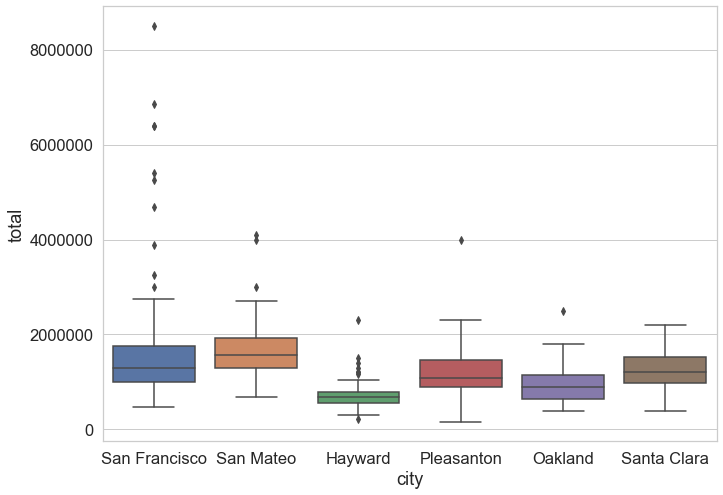

In [22]:
sns.set(rc={'figure.figsize':(11,8)}, font_scale=1.5, style='whitegrid')
sns.boxplot(x='city', y="total", data=house_w_category)

In [23]:
#Remove outliers by city with a zscore of 2 and put them in a list
Q1 = house_w_category['total'].quantile(0.25)
Q3 = house_w_category['total'].quantile(0.75)
IQR = Q3 - Q1    #IQR is interquartile range. 

filter = (house_w_category['total'] >= Q1 - 1.5 * IQR) & (house_w_category['total'] <= Q3 + 1.5 *IQR)
hayward_woOutliers= house_w_category[house_w_category['city']== 'Hayward'].loc[filter]
sanmateo_woOutliers= house_w_category[house_w_category['city']== 'San Mateo'].loc[filter]
sanfrancisco_woOutliers= house_w_category[house_w_category['city']== 'San Francisco'].loc[filter] 
oakland_woOutliers= house_w_category[house_w_category['city']== 'Oakland'].loc[filter]
pleasanton_woOutliers= house_w_category[house_w_category['city']== 'Pleasanton'].loc[filter]
santaclara_woOutliers= house_w_category[house_w_category['city']== 'Santa Clara'].loc[filter]

frame= [hayward_woOutliers,sanmateo_woOutliers,sanfrancisco_woOutliers,oakland_woOutliers,pleasanton_woOutliers,santaclara_woOutliers]

In [24]:
#Put city df w/ no outliers into a new df
df_noOutliers = pd.concat(frame)

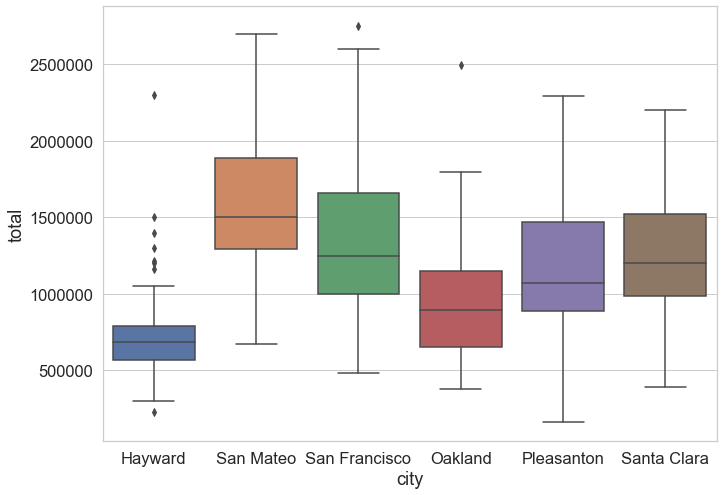

In [25]:
sns.set(rc={'figure.figsize':(11,8)}, font_scale=1.5, style='whitegrid')
sns.boxplot(x='city', y="total", data=df_noOutliers)

In [26]:
#Correlation between total and every other numerical column by city. Then put it in a df
data = {}
for city in unq_cities:
    x=df_noOutliers[df_noOutliers['city']==city]
    y=x.corrwith(df_noOutliers['total'])
    data[city]=y
    print(city)
corr_df=pd.DataFrame(data)  
corr_df



San Francisco
San Mateo
Hayward
Pleasanton
Oakland
Santa Clara


,San Francisco,San Mateo,Hayward,Pleasanton,Oakland,Santa Clara
total,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
bed,0.529049,0.688609,0.593163,0.784560,0.400843,0.787609
bath,0.595699,0.533371,0.579345,0.723554,0.501744,0.555988
square,0.699448,0.814929,0.774666,0.922043,0.573809,0.791733
lot,0.152940,0.099702,0.090870,0.665932,0.236361,0.614626
type,0.333284,0.412493,0.543857,0.619257,-0.015158,0.684523
built,-0.195374,-0.174234,0.079626,0.116554,0.251021,-0.078084
garage,0.106508,0.502453,0.428935,0.668111,0.300622,0.557918
zip,0.107757,0.062437,-0.192559,-0.041603,0.201699,-0.099638
elementary school,0.100091,0.048994,-0.125454,0.232294,0.370688,-0.043464


In [27]:
#Regression against cost and every other variable by city df after removing some outliers
no_city =  list(house_w_category.columns.difference(['city','total','address','state','zip','lot','price','Collateral','CoreLogic','Quantarium']))
y ='total'
x =[_ for _ in no_city ]
Hayd_model = sm.OLS(hayward_woOutliers[y], sm.add_constant(hayward_woOutliers[x])).fit()
SanM_model = sm.OLS(sanmateo_woOutliers[y], sm.add_constant(sanmateo_woOutliers[x])).fit()
SanF_model = sm.OLS(sanfrancisco_woOutliers[y], sm.add_constant(sanfrancisco_woOutliers[x])).fit()
SantaC_model = sm.OLS(santaclara_woOutliers[y], sm.add_constant(santaclara_woOutliers[x])).fit()
Oak_model = sm.OLS(oakland_woOutliers[y], sm.add_constant(oakland_woOutliers[x])).fit()
Pleas_model = sm.OLS(pleasanton_woOutliers[y], sm.add_constant(pleasanton_woOutliers[x])).fit()


C:\Users\STSC\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


In [28]:
#OLS for every city

#SanM_model.summary2()
#SanF_model.summary2()
#SantaC_model.summary2()
#Oak_model.summary2()
#Pleas_model.summary2()
Hayd_model.summary2()


<class 'statsmodels.iolib.summary2.Summary'>
"""
                           Results: Ordinary least squares
=====================================================================================
Model:                    OLS                    Adj. R-squared:           0.731     
Dependent Variable:       total                  AIC:                      2018.2807 
Date:                     2020-10-11 01:40       BIC:                      2041.4556 
No. Observations:         75                     Log-Likelihood:           -999.14   
Df Model:                 9                      F-statistic:              23.37     
Df Residuals:             65                     Prob (F-statistic):       3.61e-17  
R-squared:                0.764                  Scale:                    2.5171e+10
-------------------------------------------------------------------------------------
                      Coef.       Std.Err.      t    P>|t|      [0.025       0.975]  
-------------------------------------------------------------------------------------
const             -3950855.5763 2420971.6633 -1.6319 0.1075 -8785869.8587 884158.7062
bath                  6250.3312   41929.9671  0.1491 0.8820   -77489.5955  89990.2580
bed                 -29453.3845   33440.1459 -0.8808 0.3817   -96237.9675  37331.1985
built                 1935.5494    1231.3608  1.5719 0.1208     -523.6480   4394.7468
elementary school       71.6845   10506.6299  0.0068 0.9946   -20911.5043  21054.8733
garage               25809.8814   26088.1435  0.9893 0.3262   -26291.7390  77911.5018
high school           6687.4800   13814.2370  0.4841 0.6299   -20901.4564  34276.4164
middle school         6143.4049    8980.5419  0.6841 0.4964   -11791.9757  24078.7855
square                 281.8492      46.1684  6.1048 0.0000      189.6445    374.0538
type                168431.7060   30604.5637  5.5035 0.0000   107310.1716 229553.2403
-------------------------------------------------------------------------------------
Omnibus:                    93.483             Durbin-Watson:                1.872   
Prob(Omnibus):              0.000              Jarque-Bera (JB):             1893.421
Skew:                       3.614              Prob(JB):                     0.000   
Kurtosis:                   26.530             Condition No.:                338375  
=====================================================================================
* The condition number is large (3e+05). This might indicate             strong
multicollinearity or other numerical problems.
"""

In [29]:
columns = ['Hayward','San Mateo','SanFrancisco','Santa Clara','Oakland','Pleasanton']
nope = [Hayd_model.params,SanM_model.params,SanF_model.params,SantaC_model.params,Oak_model.params,Pleas_model.params]
coeff_dict = dict(zip(columns,nope))


In [30]:
#Dataframe of coeffiecents by city
coeff_df=pd.DataFrame(coeff_dict).astype(int)
coeff_df

,Hayward,San Mateo,SanFrancisco,Santa Clara,Oakland,Pleasanton
const,-3950855,5339221,4085427,-3697059,5014340,-1459638
bath,6250,42128,183999,-11819,67673,-2884
bed,-29453,33738,-54668,67718,-10154,-7900
built,1935,-2858,-1833,1537,-2424,616
elementary school,71,22490,-1955,10371,16101,-22724
garage,25809,145105,-21052,34732,9096,40893
high school,6687,27722,20497,43472,43267,1203
middle school,6143,17613,9482,63841,35365,26481
square,281,527,390,384,218,401
type,168431,58989,-42835,176951,-71796,180942


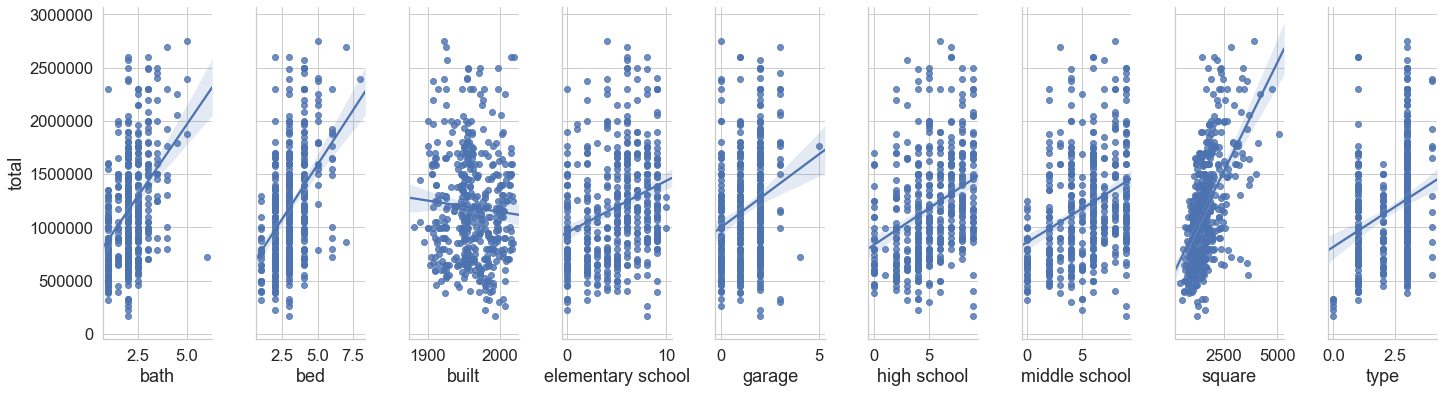

In [31]:
#Whole dataframe line plot after removing outliers by each city
cd = sns.pairplot(data=df_noOutliers,
                  x_vars=[_ for _ in no_city],
                  y_vars=['total'],height=3,aspect=.8, kind="reg")
cd.fig.set_figheight(8)
cd.fig.set_figwidth(20)

In [32]:
#Removing variables that are insignificant(pvalues>.05) and then running a new ols by city with these variables removed
Hayd_pval = Hayd_model.params[1:][Hayd_model.pvalues< .05].index
SanM_pval = SanM_model.params[1:][(SanM_model.pvalues< .05) ].index
SanF_pval = SanF_model.params[1:][SanF_model.pvalues< .05].index
SanC_pval = SantaC_model.params[1:][SantaC_model.pvalues< .05].index
Oak_pval = Oak_model.params[1:][Oak_model.pvalues< .05].index
Pleas_pval = Pleas_model.params[1:][Pleas_model.pvalues< .05].index

Hayd_final = sm.OLS(hayward_woOutliers[y], sm.add_constant(hayward_woOutliers[Hayd_pval])).fit()
SanM_final = sm.OLS(sanmateo_woOutliers[y],sm.add_constant(sanmateo_woOutliers[SanM_pval])).fit()
SanF_final = sm.OLS(sanfrancisco_woOutliers[y], sm.add_constant(sanfrancisco_woOutliers[SanF_pval])).fit()
SanC_final = sm.OLS(santaclara_woOutliers[y], sm.add_constant(santaclara_woOutliers[SanC_pval])).fit()
Oak_final = sm.OLS(oakland_woOutliers[y], sm.add_constant(oakland_woOutliers[Oak_pval])).fit()
Pleas_final = sm.OLS(pleasanton_woOutliers[y], sm.add_constant(pleasanton_woOutliers[Pleas_pval])).fit()


In [33]:
#New OlS summary after removing insignificant variables and viewing what variables are now insigificant

Hayd_final.summary2()
#SanM_final.summary2()
#SanF_final.summary2()
#SanC_final.summary2()
#Oak_final.summary2()
#Pleas_final.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                   Results: Ordinary least squares
=====================================================================
Model:                OLS              Adj. R-squared:     0.732     
Dependent Variable:   total            AIC:                2011.8490 
Date:                 2020-10-11 01:40 BIC:                2018.8015 
No. Observations:     75               Log-Likelihood:     -1002.9   
Df Model:             2                F-statistic:        101.8     
Df Residuals:         72               Prob (F-statistic): 1.02e-21  
R-squared:            0.739            Scale:              2.5137e+10
---------------------------------------------------------------------
          Coef.     Std.Err.     t    P>|t|     [0.025       0.975]  
---------------------------------------------------------------------
const  -96063.9031 62324.7702 -1.5413 0.1276 -220306.0617  28178.2555
square    320.1526    28.9690 11.0516 0.0000     262.4040    377.9011
type   127600.6996 20634.2084  6.1839 0.0000   86467.1570 168734.2421
---------------------------------------------------------------------
Omnibus:              81.254        Durbin-Watson:           1.803   
Prob(Omnibus):        0.000         Jarque-Bera (JB):        1415.296
Skew:                 2.937         Prob(JB):                0.000   
Kurtosis:             23.454        Condition No.:           5954    
=====================================================================
* The condition number is large (6e+03). This might indicate
strong multicollinearity or other numerical problems.
"""

In [34]:
#Final regression form after removing non significant variables again""""
Hayd_pval2 = Hayd_final.params[1:][Hayd_final.pvalues< .05].index
SanM_pval2 = SanM_final.params[1:][(SanM_final.pvalues< .05) ].index
SanF_pval2 = SanF_final.params[1:][SanF_final.pvalues< .05].index
SanC_pval2 = SanC_final.params[1:][SanC_final.pvalues< .05].index
Oak_pval2 = Oak_final.params[1:][Oak_final.pvalues< .05].index
Pleas_pval2 = Pleas_final.params[1:][Pleas_final.pvalues< .05].index

Hayd_final2 = sm.OLS(hayward_woOutliers[y], sm.add_constant(hayward_woOutliers[Hayd_pval2])).fit()
SanM_final2 = sm.OLS(sanmateo_woOutliers[y],sm.add_constant(sanmateo_woOutliers[SanM_pval2])).fit()
SanF_final2 = sm.OLS(sanfrancisco_woOutliers[y], sm.add_constant(sanfrancisco_woOutliers[SanF_pval2])).fit()
SanC_final2 = sm.OLS(santaclara_woOutliers[y], sm.add_constant(santaclara_woOutliers[SanC_pval2])).fit()
Oak_final2 = sm.OLS(oakland_woOutliers[y], sm.add_constant(oakland_woOutliers[Oak_pval2])).fit()
Pleas_final2 = sm.OLS(pleasanton_woOutliers[y], sm.add_constant(pleasanton_woOutliers[Pleas_pval2])).fit()


In [35]:
#Hayd_final2.summary2()
SanM_final2.summary2()
#SanF_final2.summary2()
#SanC_final2.summary2()
#Oak_final2.summary2()
#Pleas_final2.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                  Results: Ordinary least squares
===================================================================
Model:              OLS              Adj. R-squared:     0.690     
Dependent Variable: total            AIC:                2300.4246 
Date:               2020-10-11 01:40 BIC:                2307.6812 
No. Observations:   83               Log-Likelihood:     -1147.2   
Df Model:           2                F-statistic:        92.40     
Df Residuals:       80               Prob (F-statistic): 1.61e-21  
R-squared:          0.698            Scale:              6.1519e+10
-------------------------------------------------------------------
          Coef.     Std.Err.     t    P>|t|    [0.025      0.975]  
-------------------------------------------------------------------
const  296724.6240 99731.1992  2.9752 0.0039 98253.2126 495196.0355
garage 142335.0757 47596.1134  2.9905 0.0037 47615.7915 237054.3600
square    649.3754    59.7933 10.8603 0.0000   530.3829    768.3679
-------------------------------------------------------------------
Omnibus:                3.550        Durbin-Watson:           1.422
Prob(Omnibus):          0.169        Jarque-Bera (JB):        2.801
Skew:                   0.406        Prob(JB):                0.246
Kurtosis:               3.390        Condition No.:           6439 
===================================================================
* The condition number is large (6e+03). This might indicate
strong multicollinearity or other numerical problems.
"""

In [36]:
#Dict of each city significant columns for the linear regression formula
pval_dict2 = {'Hayward':Hayd_pval2,'San Mateo':SanM_pval2,'San Francisco':SanF_pval2,'Santa Clara':SanC_pval2,'Oakland':Oak_pval2,'Pleasanton':Pleas_pval2}
pval_dict2

{'Hayward': Index(['square', 'type'], dtype='object'),
 'San Mateo': Index(['garage', 'square'], dtype='object'),
 'San Francisco': Index(['bath', 'square'], dtype='object'),
 'Santa Clara': Index(['high school', 'middle school', 'square', 'type'], dtype='object'),
 'Oakland': Index(['high school', 'middle school', 'square'], dtype='object'),
 'Pleasanton': Index(['square', 'type'], dtype='object')}

In [37]:
#Coeffiecents of the final linear regression model for each city

Hayd_final2.params.round()
#SanM_final2.params.round()
#SanF_final2.params.round()
#SanC_final2.params.round()
#Oak_final2.params.round()
#Pleas_final2.params.round()

const     -96064.0
square       320.0
type      127601.0
dtype: float64

In [38]:
#Test our final linear regression model. Grab random sample for each city and plug in the coeffiecients, then provide us the discrepancy in pct.
def test_model():
    for city in df_noOutliers.city.unique():
        smpl = df_noOutliers[df_noOutliers['city']==city].sample()
        smpl_cost = smpl['total'].values[0]           
        if city == 'Hayward':
            lm = -96064 + (320*smpl.square.values[0]) + (127601*smpl.type.values[0])
            print(smpl[['city','square','type']])
            print("\nRealtor's price is '{}' but with our model we got '{}'.We're off by '{:.2f}%'".format(smpl_cost,lm,(smpl_cost-lm)/smpl_cost*100))
            print('='*100+'\n')
        if city == 'San Mateo':
            lm = 296725 + (142335*smpl.garage.values[0])+ (649*smpl.square.values[0])
            print(smpl[['city','garage','square']])
            print("\nRealtor's price is '{}' but with our model we got '{}'.We're off by '{:.2f}%'".format(smpl_cost,lm,(smpl_cost-lm)/smpl_cost*100))
            print('='*100+'\n')
        if city == 'San Francisco':
            lm= 572981 + (137064*smpl.bath.values[0]) + (345*smpl.square.values[0])
            print(smpl[['city','bath','square']])
            print("\nRealtor's price is '{}' but with our model we got '{}'.We're off by '{:.2f}%'".format(smpl_cost,lm,(smpl_cost-lm)/smpl_cost*100))
            print('='*100+'\n')
        if city == 'Santa Clara':
            lm = -580248 + (48638*smpl['high school'].values[0]) + (55085*smpl['middle school'].values[0]) + (532*smpl.square.values[0])+ (178770*smpl.type.values[0])
            print(smpl[['city','high school','middle school','square','type']])
            print("\nRealtor's price is '{}' but with our model we got '{}'.We're off by '{:.2f}%'".format(smpl_cost,lm,(smpl_cost-lm)/smpl_cost*100))
            print('='*100+'\n')
        if city == 'Oakland':
            lm=220080 + (46046*smpl['high school'].values[0])+ (37886*smpl['middle school'].values[0]) + (234*smpl.square.values[0])
            print(smpl[['city','high school','middle school','square']])
            print("\nRealtor's price is '{}' but with our model we got '{}'.We're off by '{:.2f}%'".format(smpl_cost,lm,(smpl_cost-lm)/smpl_cost*100))
            print('='*100+'\n')
        if city == 'Pleasanton':
            lm=-150322 + (412*smpl.square.values[0]) + (168473*smpl.type.values[0])
            print(smpl[['city','square','type']])
            print("\nRealtor's price is '{}' but with our model we got '{}'.We're off by '{:.2f}%'".format(smpl_cost,lm,(smpl_cost-lm)/smpl_cost*100))
            print('='*100+'\n')

In [39]:
#Run to see results
test_model()

        city  square  type
Seq                       
204  Hayward    1515     3

Realtor's price is '699900' but with our model we got '771539'.We're off by '-10.24%'

          city  garage  square
Seq                           
198  San Mateo       1    1165

Realtor's price is '1039000' but with our model we got '1195145'.We're off by '-15.03%'

              city  bath  square
Seq                             
24   San Francisco   1.5     690

Realtor's price is '649000' but with our model we got '1016627.0'.We're off by '-56.65%'

        city  high school  middle school  square
Seq                                             
373  Oakland          0.0            2.0    2204

Realtor's price is '1588000' but with our model we got '811588.0'.We're off by '48.89%'

           city  square  type
Seq                          
286  Pleasanton    3688     3

Realtor's price is '1645000' but with our model we got '1874553'.We're off by '-13.95%'

            city  high school  middle sch

In [ ]:
x = data.iloc[:, :-1].values
y = data.iloc[:, -1:].values

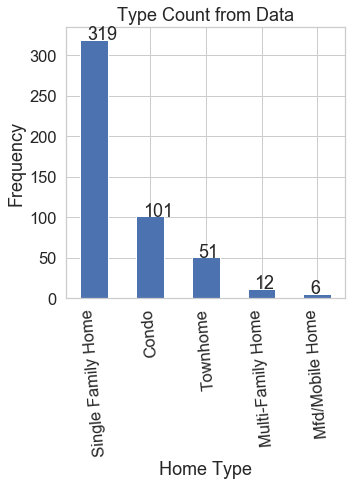

In [40]:
#Next four cells were for a hypothesis about type of homes, if we had extra time
#Create a count bar graph of by type of home
ax = house_sample['type'].value_counts().plot(kind='bar',
                                    figsize=(5,5),
                                    title="Type Count from Data", rot=95)
ax.set_xlabel("Home Type")
ax.set_ylabel("Frequency")
for p in ax.patches:
    ax.annotate("%d" % p.get_height(), (p.get_x() + p.get_width() / 4., p.get_height()))

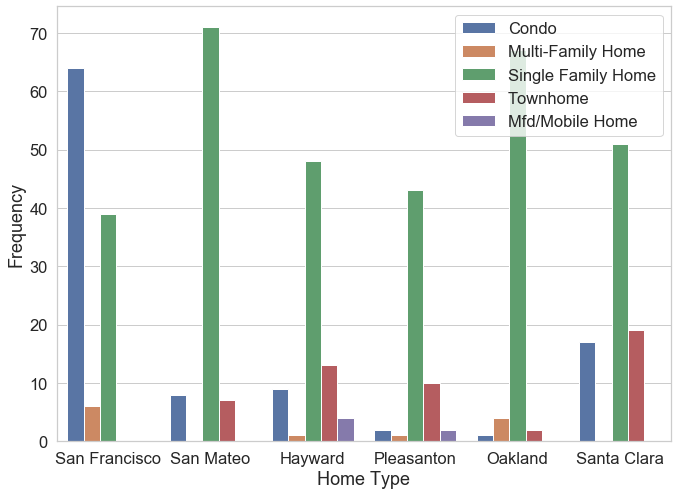

In [41]:
#Count plot of types of home by city
bx = sns.countplot(x="city", hue="type", data=house_sample)
bx.set_xlabel("Home Type")
bx.set_ylabel("Frequency")
bx.legend(loc='upper right')


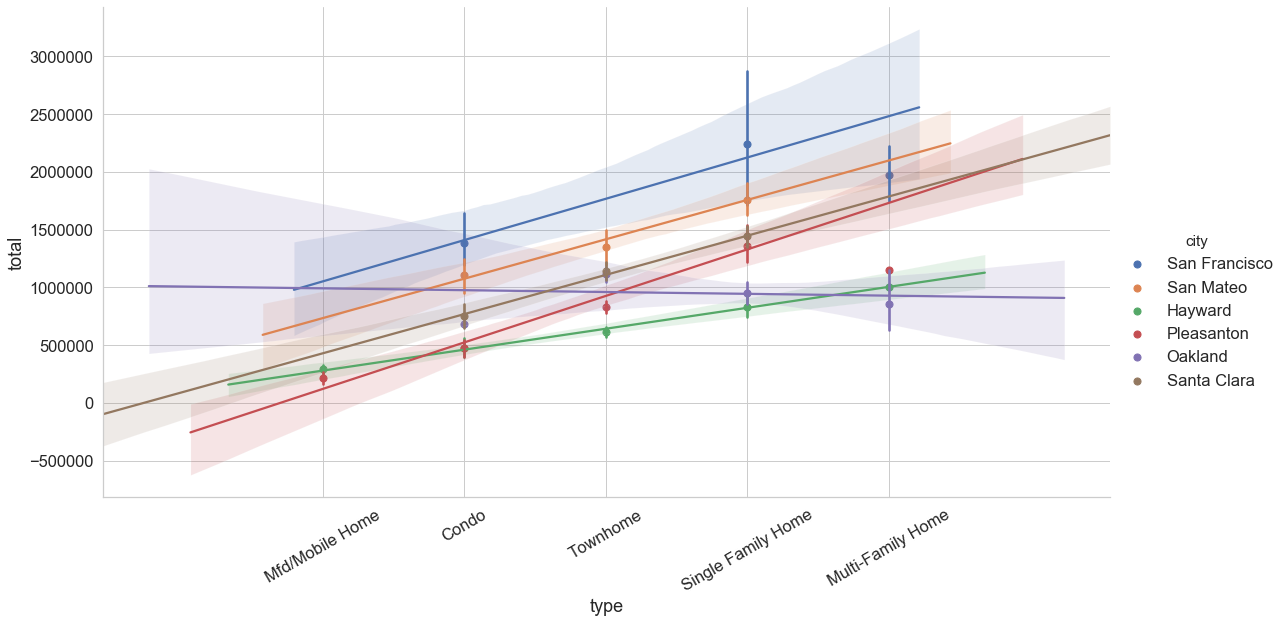

In [42]:
#Run relationship line plot of mean home type in each city against total cost using original data. Then rename xticks.
sort_homes_dict = {'Mfd/Mobile Home': 0,'Condo': 1,'Townhome': 2,'Single Family Home':3,'Multi-Family Home': 4}
g = sns.lmplot(x="type", y="total", data=house_w_category, x_estimator=np.mean, hue='city', height=8, aspect=2)
g.set(xticks=range(0,5), xticklabels=list(sort_homes_dict.keys()))
g.set_xticklabels(rotation=30)

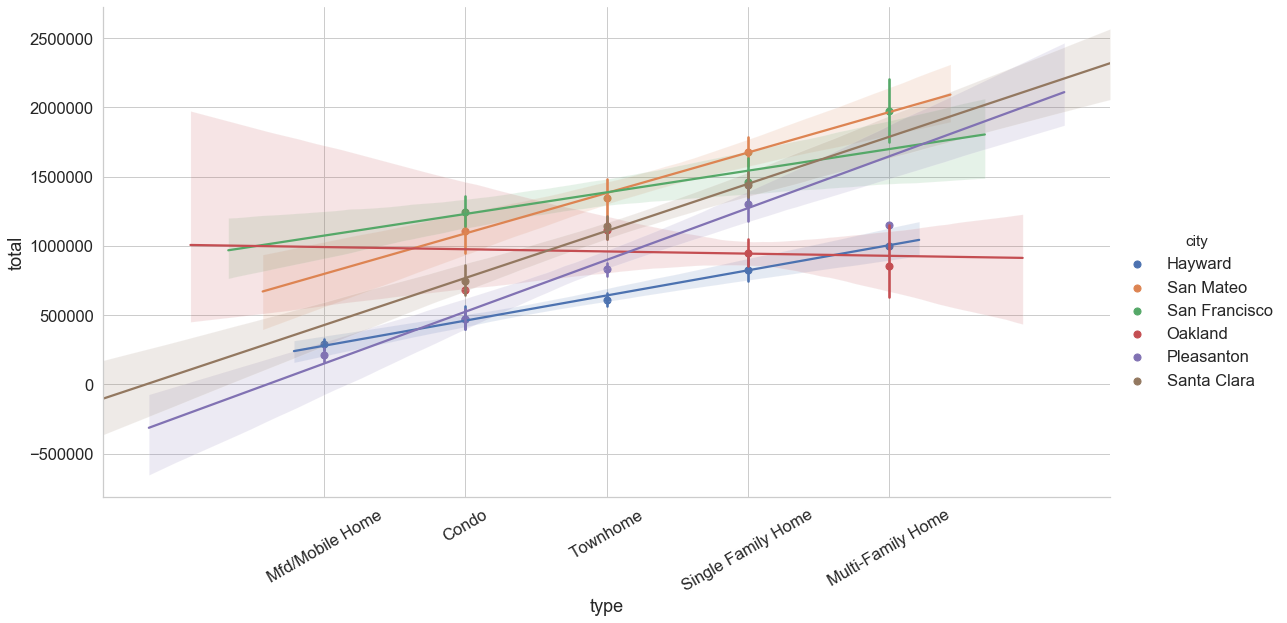

In [43]:
##Run relationship line plot of mean home type in each city against total cost using data w/o outliers. Then rename xticks.
#Pleasanton now has a strong positive relationship and now Oakland has a negative relationship. SF median has decreased for each type.
g2= sns.lmplot(x="type", y="total", data=df_noOutliers, x_estimator=np.mean, hue='city', height=8, aspect=2)
g2.set(xticks=range(0,5), xticklabels=list(sort_homes_dict.keys()))
g2.set_xticklabels(rotation=30)

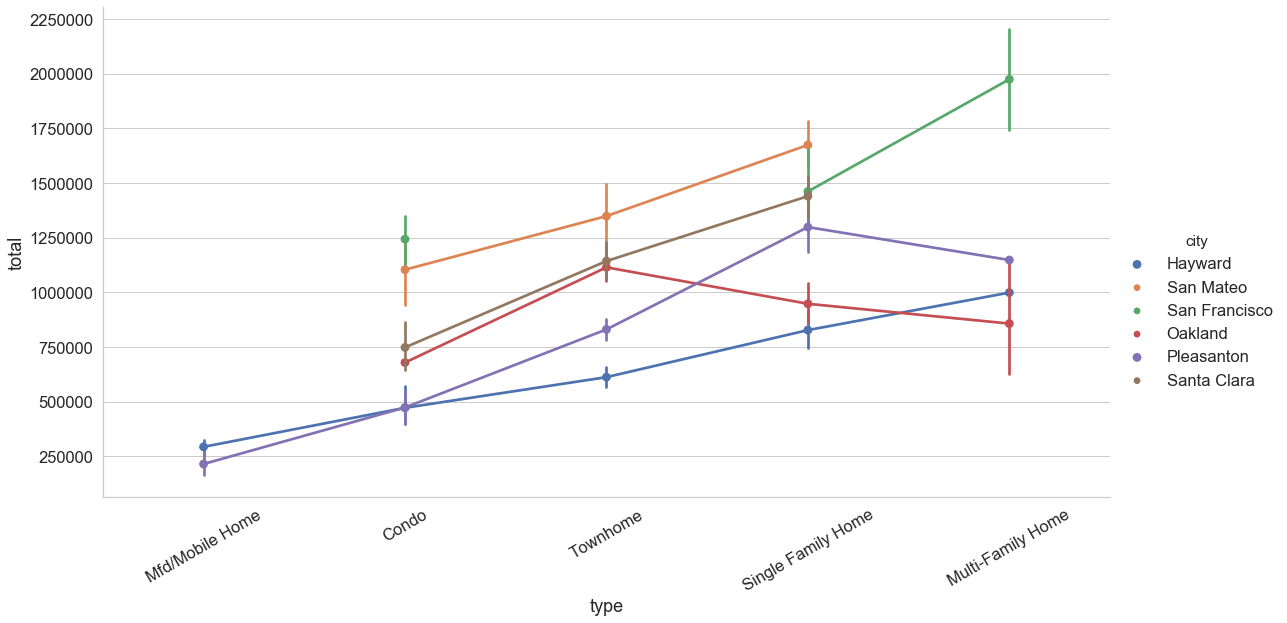

In [44]:
#An indepth view of the relationship between type of home and total in the df w/no outliers. This shows you where the median increases and where it starts to decrease if possible.
s = sns.catplot(x="type", y="total", data=df_noOutliers, x_estimator=np.mean, hue='city',kind='point',height=8, aspect=2)
s.set(xticks=range(0,5), xticklabels=list(sort_homes_dict.keys()))
s.set_xticklabels(rotation=30)